# Installing Library

In [1]:
%%capture
!pip install gwpy
!pip install gwosc # provides an interface to querying the open data releases hosted on https://gwosc.org

## General Modules

In [2]:
from gwosc import datasets
from gwosc.api import fetch_event_json
from gwosc.locate import get_event_urls,get_urls
from gwosc.timeline import get_segments,timeline_url

In [3]:
from gwpy.timeseries import TimeSeries

## Datasets

In [4]:
print(f"Datasets:\n\n{datasets.find_datasets(type='events')}\n\nTotal Data-Events: {len(datasets.find_datasets(type='events'))}")

Datasets:

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191118_212859-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200121_031748-v1', '200201_203549-v1', '200214_224526-v1', '200214_224526-v2', '200219_201407-v1', '200311_103121-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-v2', 'G

In [5]:
# example event output
fetch_event_json("GW150914-v1")["events"]["GW150914-v1"]

{'commonName': 'GW150914',
 'version': 1,
 'catalog.shortName': 'O1_O2-Preliminary',
 'GPS': 1126259462.4,
 'gracedb_id': 'G184098',
 'reference': 'https://doi.org/10.7935/K5MW2F23',
 'jsonurl': 'https://gwosc.org/eventapi/json/O1_O2-Preliminary/GW150914/v1',
 'mass_1_source': None,
 'mass_1_source_lower': None,
 'mass_1_source_upper': None,
 'mass_1_source_unit': None,
 'mass_2_source': None,
 'mass_2_source_lower': None,
 'mass_2_source_upper': None,
 'mass_2_source_unit': None,
 'network_matched_filter_snr': None,
 'network_matched_filter_snr_lower': None,
 'network_matched_filter_snr_upper': None,
 'network_matched_filter_snr_unit': None,
 'luminosity_distance': None,
 'luminosity_distance_lower': None,
 'luminosity_distance_upper': None,
 'luminosity_distance_unit': None,
 'chi_eff': None,
 'chi_eff_lower': None,
 'chi_eff_upper': None,
 'chi_eff_unit': None,
 'total_mass_source': None,
 'total_mass_source_lower': None,
 'total_mass_source_upper': None,
 'total_mass_source_unit': 

In [6]:
allEvents = datasets.find_datasets(type="events")
events = set()
for event in allEvents:
  name = fetch_event_json(event)["events"][event]["commonName"]
  if name[:2] == "GW":
    events.add(name)
if len(events) > 0:
  events = list(events)
  events.sort()

In [7]:
print(f"Total GW (Gravitational Wave) Events: {len(events)}")

Total GW (Gravitational Wave) Events: 98


# Event Informations

For documentation: https://gwosc.org/GWTC-1/

In [44]:
targetEvent = events[1]
print(f"Event Name: {targetEvent}")

Event Name: GW151012


In [46]:
eventAllInformation = fetch_event_json(targetEvent)
eventInformation = eventAllInformation["events"].items()
for keyName,valueName in eventInformation:
  print(f"{keyName}: {valueName}")

GW151012-v3: {'commonName': 'GW151012', 'version': 3, 'catalog.shortName': 'GWTC-1-confident', 'GPS': 1128678900.4, 'gracedb_id': 'G197392', 'reference': 'https://doi.org/10.7935/82H3-HH23', 'jsonurl': 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW151012/v3', 'mass_1_source': 23.2, 'mass_1_source_lower': -5.5, 'mass_1_source_upper': 14.9, 'mass_1_source_unit': 'M_sun', 'mass_2_source': 13.6, 'mass_2_source_lower': -4.8, 'mass_2_source_upper': 4.1, 'mass_2_source_unit': 'M_sun', 'network_matched_filter_snr': 10.0, 'network_matched_filter_snr_lower': None, 'network_matched_filter_snr_upper': None, 'network_matched_filter_snr_unit': '', 'luminosity_distance': 1080.0, 'luminosity_distance_lower': -490.0, 'luminosity_distance_upper': 550.0, 'luminosity_distance_unit': 'Mpc', 'chi_eff': 0.05, 'chi_eff_lower': -0.2, 'chi_eff_upper': 0.31, 'chi_eff_unit': '', 'total_mass_source': None, 'total_mass_source_lower': None, 'total_mass_source_upper': None, 'total_mass_source_unit': None, 'chir

In [53]:
# https://journals.aps.org/prx/abstract/10.1103/PhysRevX.9.031040
# https://gwosc.org/eventapi/html/GWTC-1-confident/GW151012/v3/
for keyName,valueName in eventInformation:
  massOne = valueName["mass_1_source"]
  massTwo = valueName["mass_2_source"]
  massOneUnit = valueName["mass_1_source_unit"]
  massTwoUnit = valueName["mass_2_source_unit"]
  finalMass = valueName["final_mass_source"]
  finalMassUnit = valueName["final_mass_source_unit"]
  luminosityDistance = valueName["luminosity_distance"]
  luminosityDistanceUnit = valueName["luminosity_distance_unit"]
  luminosityPeak = valueName["parameters"]["gwtc1_pe_GW151012"]["L_peak"]
  luminosityPeakUnit = valueName["parameters"]["gwtc1_pe_GW151012"]["L_peak_unit"]
  radiatedEnergy = valueName["parameters"]["gwtc1_pe_GW151012"]["E_rad"]
  radiatedEnergyUnit = valueName["parameters"]["gwtc1_pe_GW151012"]["E_rad_unit"]
  skyAreaLocalization = valueName["parameters"]["gwtc1_pe_GW151012"]["sky_area"]
  skyAreaLocalizationUnit = valueName["parameters"]["gwtc1_pe_GW151012"]["sky_area_unit"]
  redshift = valueName["parameters"]["gwtc1_pe_GW151012"]["redshift"]
  reference = valueName["reference"]


**The total mass of the two black holes, measured in M☉ (Solar mass; the mass of the Sun)**

**The distance of the source from Earth in Mpc (Megaparsec; 3.26 million light years).**

In [54]:
print(f"Primary Mass: {massOne} {massOneUnit}")
print(f"Secondary Mass: {massTwo} {massTwoUnit}")
print(f"Final Mass: {finalMass} {finalMassUnit}")
print(f"Luminosity Distance: {luminosityDistance} {luminosityDistanceUnit} with {luminosityPeak} {luminosityPeakUnit}")
print(f"Raidated Energy: {radiatedEnergy} {radiatedEnergyUnit}")
print(f"Sky Localization: {skyAreaLocalization} {skyAreaLocalizationUnit}")
print(f"Redshift: {redshift}")

Primary Mass: 23.2 M_sun
Secondary Mass: 13.6 M_sun
Final Mass: 35.6 M_sun
Luminosity Distance: 1080.0 Mpc with 3.2 10^56 erg s^-1
Raidated Energy: 1.6 M_sun c^2
Sky Localization: 1523.0 deg^2
Redshift: 0.21


# Time Process For GPS Time

In [8]:
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [9]:
currentTime = datetime.now()
iso8601Time = currentTime.isoformat()
print(f"Current Time as ISO: {iso8601Time}")

Current Time as ISO: 2023-12-20T19:56:55.523434


In [10]:
passTime = datetime(2000,1,1)
isoPassTime = passTime.isoformat()
print(f"Pass Time as ISO: {isoPassTime}")

Pass Time as ISO: 2000-01-01T00:00:00


In [11]:
def ConvertISOtoGPSTime(isoTime:str)->int or float:
  # Convert ISO8601 string to datetime object
  utcDatetime = datetime.fromisoformat(isoTime.replace("Z","+00:00"))
  # GPS time starts from January 6, 1980, and there were 19 leap seconds until 2022
  gpsEpoch = datetime(1980,1,6,0,0,0)+timedelta(seconds=19)
  # Calculate the time difference between UTC and GPS time
  timeDifference = utcDatetime-gpsEpoch
  gpsTime = timeDifference.total_seconds()
  return gpsTime

In [12]:
def ConvertGPSTimetoISO(gpsTime:int or float)->str:
  # GPS time starts from January 6, 1980
  gpsEpoch = datetime(1980,1,6,0,0,0)
  # Add GPS time to GPS epoch
  UTCDatetime = gpsEpoch+timedelta(seconds=gpsTime)
  iso = UTCDatetime.strftime("%Y-%m-%dT%H:%M:%S")
  return iso

In [13]:
currentGPSTime = ConvertISOtoGPSTime(iso8601Time)
print(f"Current GPS Time: {currentGPSTime}")
currentISO = ConvertGPSTimetoISO(currentGPSTime)
print(f"Current ISO Time: {currentISO}")
passGPSTime = ConvertISOtoGPSTime(isoPassTime)
print(f"Pass GPS Time: {passGPSTime}")
passISO = ConvertGPSTimetoISO(passGPSTime)
print(f"Pass ISO Time: {passISO}") # 0.19 sec difference

Current GPS Time: 1387137396.523434
Current ISO Time: 2023-12-20T19:56:36
Pass GPS Time: 630719981.0
Pass ISO Time: 1999-12-31T23:59:41


In [14]:
exampleEvent = events[3]
print(f"Event: {exampleEvent}")
eventGPS = datasets.event_gps(exampleEvent)
print(f"GPS Time: {eventGPS}")
eventISO = ConvertGPSTimetoISO(eventGPS)
print(f"ISO Time: {eventISO}")

Event: GW170104
GPS Time: 1167559936.6
ISO Time: 2017-01-04T10:12:16


# Detectors With Events

In [15]:
exampleEvent = events[5]
eventDetectors = datasets.event_detectors(exampleEvent)
print(f"Detectors:\n{eventDetectors}\nFor Event: {exampleEvent}")

Detectors:
{'H1', 'V1', 'L1'}
For Event: GW170729


# Event Files

In [16]:
exampleEvent = events[10]
eventFile = get_event_urls(exampleEvent)
print(f"Event: {exampleEvent}\n\nFiles:\n{eventFile}")

Event: GW170823

Files:
['https://gwosc.org/eventapi/json/GWTC-1-confident/GW170823/v1/H-H1_GWOSC_4KHZ_R1-1187529241-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170823/v1/H-H1_GWOSC_4KHZ_R1-1187527209-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170823/v1/L-L1_GWOSC_4KHZ_R1-1187529241-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170823/v1/L-L1_GWOSC_4KHZ_R1-1187527209-4096.hdf5']


**URLs using duration and detector informations**

In [17]:
eventFile = get_event_urls("GW150914",detector="L1",duration=32,format="hdf5")
print(f"Event: GW150914 with Duration (32) and Detector (L1) As HDF5 File\n\nFiles:\n{eventFile}")

Event: GW150914 with Duration (32) and Detector (L1) As HDF5 File

Files:
['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


**URLs based on the GPS time interval**

In [18]:
startDate = datetime(2000,1,1).isoformat()
startGPS = ConvertISOtoGPSTime(startDate)
endDate = datetime(2001,1,1).isoformat()
endGPS = ConvertISOtoGPSTime(endDate)
print(f"Time Interval:\n\nStart: {startGPS} or {startDate}\nEnd: {endGPS} or {endDate}")

Time Interval:

Start: 630719981.0 or 2000-01-01T00:00:00
End: 662342381.0 or 2001-01-01T00:00:00


In [19]:
try:
  eventWithInterval = get_urls(detector="H1",start=startGPS,end=endGPS)
  print(f"Event Files with Interval for Detector H1\n{eventWithInterval}")
except:
  print("No events for that time interval for Detector H1")

No events for that time interval for Detector H1


In [20]:
startGPS = 968650000
startISO = ConvertGPSTimetoISO(startGPS)
endGPS = 968660000
endISO = ConvertGPSTimetoISO(endGPS)
print(f"Time Interval:\n\nStart: {startGPS} or {startISO}\nEnd: {endGPS} or {endISO}\n\n")
try:
  eventWithInterval = get_urls(detector="H1",start=startGPS,end=endGPS)
  print(f"Event Files with Interval for Detector H1\n{eventWithInterval}")
except:
  print("No events for that time interval for Detector H1")

Time Interval:

Start: 968650000 or 2010-09-16T05:26:40
End: 968660000 or 2010-09-16T08:13:20


Event Files with Interval for Detector H1
['https://gwosc.org/archive/data/S6/967835648/H-H1_LOSC_4_V1-968646656-4096.hdf5', 'https://gwosc.org/archive/data/S6/967835648/H-H1_LOSC_4_V1-968650752-4096.hdf5', 'https://gwosc.org/archive/data/S6/967835648/H-H1_LOSC_4_V1-968654848-4096.hdf5', 'https://gwosc.org/archive/data/S6/967835648/H-H1_LOSC_4_V1-968658944-4096.hdf5']


**Returns the Timeline JSON URL for a flag name and GPS interval**

In [21]:
flags = ['L1_DATA','H1_DATA','V1_DATA'] # detectors

In [22]:
startTimeGPS = 1126051217
startTimeISO = ConvertGPSTimetoISO(startTimeGPS)
endTimeGPS = 1126151217
endTimeISO = ConvertGPSTimetoISO(endTimeGPS)
print(f"Time Interval From {startTimeGPS} or {startTimeISO} To {endTimeGPS} or {endTimeISO}\n\n")
gpsIntervalsForH1Data = get_segments("H1_DATA",startTimeGPS,endTimeGPS)
print(f"Data Intervals:\n{gpsIntervalsForH1Data}\n")
intervalDataForH1Data = timeline_url("H1_DATA",startTimeGPS,endTimeGPS)
print(f"Data URLs with Time Interval {startTimeGPS} ... {endTimeGPS}:\n{intervalDataForH1Data}")

Time Interval From 1126051217 or 2015-09-12T00:00:17 To 1126151217 or 2015-09-13T03:46:57


Data Intervals:
[(1126073529, 1126114861), (1126121462, 1126123267), (1126123553, 1126126832), (1126139205, 1126139266), (1126149058, 1126151217)]

Data URLs with Time Interval 1126051217 ... 1126151217:
https://gwosc.org/timeline/segments/json/O1/H1_DATA/1126051217/100000/


# Event Segmentation

**Returns the `GPS [start, stop)` interval covered by an event dataset**

In [23]:
exampleEvent = events[3]
intervalEventGPSTime = datasets.event_segment(exampleEvent)
print(f"Interval for Event: {exampleEvent}\n\n{intervalEventGPSTime} as GPS Time\n")
intervalEventISOTime = (ConvertGPSTimetoISO(intervalEventGPSTime[0]),ConvertGPSTimetoISO(intervalEventGPSTime[1]))
print(f"Interval for Event: {(exampleEvent)}\n\n{intervalEventISOTime} as ISO Time")

Interval for Event: GW170104

(1167557889, 1167561985) as GPS Time

Interval for Event: GW170104

('2017-01-04T09:38:09', '2017-01-04T10:46:25') as ISO Time


**Find datasets available on the given GW open science host with detectors**

In [24]:
eventsWithDetectorH1 = datasets.find_datasets(detector="H1")
print(f"Event for detector H1:\n{eventsWithDetectorH1}\nTotal Event For Detector H1: {len(eventsWithDetectorH1)}")

Event for detector H1:
['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '191223_014159-v1', '200114_020818-v1', '200121_031748-v1', '200201_203549-v1', '200214_224526-v1', '200214_224526-v2', '200219_201407-v1', '200311_103121-v1', 'BKGW170608_16KHZ_R1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-v2', 'GW190421_213856-v1', 'GW190421_213856-v2',

**Returns the name of the open-data event matching the GPS time**

In [25]:
iso8601CurrentTime = datetime.now().isoformat()
currentGPSTime = ConvertISOtoGPSTime(iso8601CurrentTime)
try:
  todayEvent = datasets.event_at_gps(currentGPSTime)
  print(f"Current event: {todayEvent} for ISO Time ({iso8601CurrentTime}) or GPS Time ({currentGPSTime})")
  intervalTodayEventGPSTime = datasets.event_segment(todayEvent)
  intervalTodayEventISOTime = (ConvertGPSTimetoISO(intervalTodayEventGPSTime[0]),ConvertGPSTimetoISO(intervalTodayEventGPSTime[1]))
  print(f"Event Interval: {intervalTodayEventGPSTime} or {intervalTodayEventISOTime}")
except:
  print("No event for today")

No event for today


In [26]:
exampleGPSTime = 1187008882
exampleISOTime = ConvertGPSTimetoISO(exampleGPSTime)
try:
  exampleEvent = datasets.event_at_gps(exampleGPSTime)
  print(f"Event: {exampleEvent} for ISO Time ({exampleISOTime}) or GPS Time ({exampleGPSTime})")
  intervalExampleEventGPSTime = datasets.event_segment(exampleEvent)
  intervalExampleEventISOTime = (ConvertGPSTimetoISO(intervalExampleEventGPSTime[0]),ConvertGPSTimetoISO(intervalExampleEventGPSTime[1]))
  print(f"Event Interval: {intervalExampleEventGPSTime} or {intervalExampleEventISOTime}")
except:
  print(f"No event for {exampleISOTime}")

Event: GW170817 for ISO Time (2017-08-17T12:41:22) or GPS Time (1187008882)
Event Interval: (1187006835, 1187010931) or ('2017-08-17T12:07:15', '2017-08-17T13:15:31')


# Query & Download

In [27]:
import requests,os

In [28]:
exampleDetector = "H1"

In [29]:
exampleGPS,exampleISO = 1187008882,ConvertGPSTimetoISO(1187008882)
print(f"GPS Time: {exampleGPS}\nISO Time: {exampleISO}")

GPS Time: 1187008882
ISO Time: 2017-08-17T12:41:22


In [30]:
eventAtGPS = datasets.event_at_gps(exampleGPS)
print(f"Event Name: {eventAtGPS}")

Event Name: GW170817


In [31]:
eventSegment = datasets.event_segment(eventAtGPS)
print(f"Event Intervals:\n{eventSegment}")

Event Intervals:
(1187006835, 1187010931)


In [32]:
startTime,endTime = eventSegment[0],eventSegment[1]
print(f"Event Start Time: {startTime}\nEvent End Time: {endTime}")
centerStartTime = int(startTime)
centerEndTime = int(endTime)

Event Start Time: 1187006835
Event End Time: 1187010931


In [33]:
dataURL = get_urls(exampleDetector,startTime,endTime)
print(f"Event Data URLs:\n{dataURL}")

Event Data URLs:
['https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']


In [34]:
selectedData = dataURL[-1]
print(f"Data URL:\n{selectedData}")

Data URL:
https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5


In [35]:
urlBase = os.path.basename(selectedData).replace("-","_")
print(f"URL - File Base:\n{urlBase}")

URL - File Base:
H_H1_GWOSC_4KHZ_R1_1187006835_4096.hdf5


In [36]:
try:
  if not os.path.exists(urlBase):
    with open(urlBase,"wb") as wFile:
      contentData = requests.get(selectedData,timeout=300,verify=False,stream=True,allow_redirects=True).content
      wFile.write(contentData)
      if os.path.exists(urlBase):
        print(f"File Has Been Saved [OK]")
        filePath = "/content/H_H1_GWOSC_4KHZ_R1_1187006835_4096.hdf5"
        print(f"File Path: {filePath}")
  else:
    print(f"File Exists [OK]")
    filePath = "/content/H_H1_GWOSC_4KHZ_R1_1187006835_4096.hdf5"
    print(f"File Path: {filePath}")
except Exception as err:
  print(str(err))

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gwosc.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File Has Been Saved [OK]
File Path: /content/H_H1_GWOSC_4KHZ_R1_1187006835_4096.hdf5


# Data Read

In [37]:
strainData = TimeSeries.read(filePath,format="hdf5.gwosc")

In [38]:
strainData

<TimeSeries([-1.90953777e-19, -1.76176603e-19, -1.82604103e-19,
             ..., -6.70231357e-19, -6.61236726e-19,
             -6.77738035e-19]
            unit=Unit(dimensionless),
            t0=<Quantity 1.18700684e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

# Data Plot & Overview

In [39]:
strain = strainData.crop(centerStartTime-16,centerStartTime+16)

/usr/local/lib/python3.10/dist-packages/gwpy/types/series.py:981: UserWarning: TimeSeries.crop given start smaller than current start, crop will begin when the Series actually starts.
  warn(


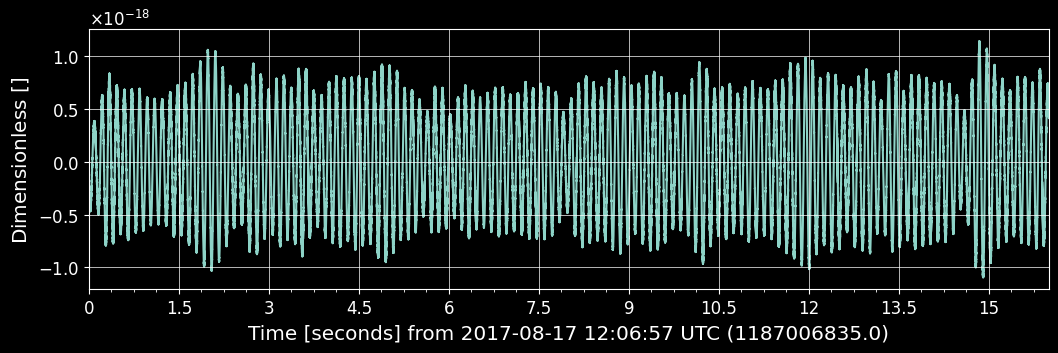

In [40]:
figure1 = strain.plot()
plt.show()

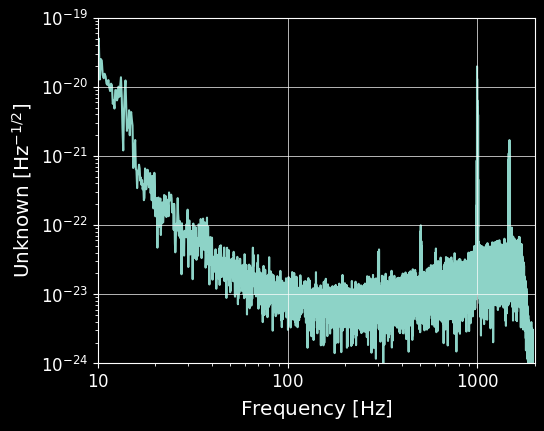

In [41]:
figure2ASD = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24,1e-19)
plt.show()

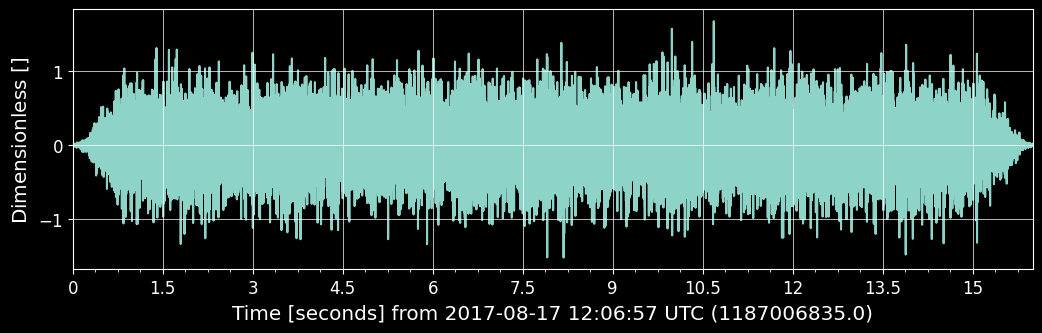

In [42]:
# Whitening is a process that re-weights a signal, so that all frequency bins have a nearly equal amount of noise
whiteData = strain.whiten()
bpData = whiteData.bandpass(30,400)
figure3BPWhite = bpData.plot()
plt.show()

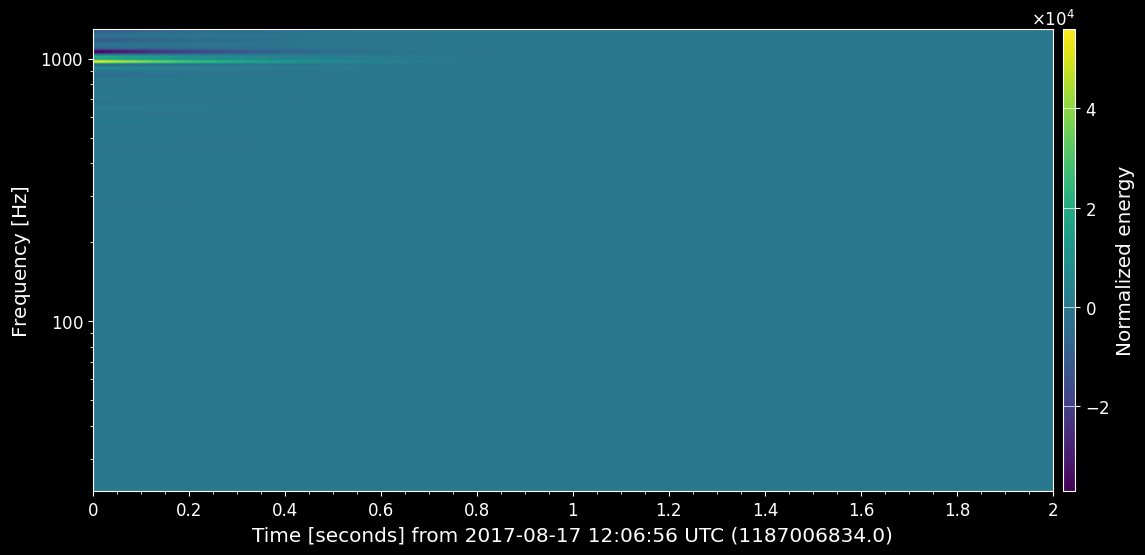

In [43]:
# a signal’s frequency changes with time
inSecond = 1 # Set width of q-transform plot, in seconds
HQTransformData = strain.q_transform(outseg=(startTime-inSecond,startTime+inSecond))
figure4HQ = HQTransformData.plot()
axs = figure4HQ.gca()
axs.grid(False)
axs.set_yscale("log")
try:
  figure4HQ.colorbar(label="Normalized energy")
except:
  pass
plt.show()